# SVM Classifier for non-linearly separable data

In [1]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. Let's build our "XOR" dataset

Let's try to classify a non-linearly separable dataset like this one

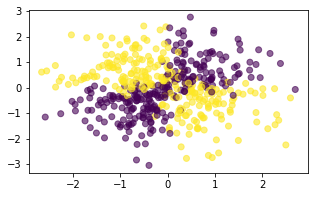

To that end, we will create a 2D dataset using [logical XOR gates](https://en.wikipedia.org/wiki/XOR_gate)

Try to understand how this work by playing with `np.logical_xor` in the cells below:

In [2]:
print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))

False
True
False


In [ ]:
np.logical_xor([True, True, False], [True, False, False])

Let's now create a own synthetic 2D dataset where 

$$ y = 
\begin{cases}
    1 & \text{if } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{otherwise}
\end{cases}
$$


In [3]:
# Number of datapoints
n = 500
noise = 0.2

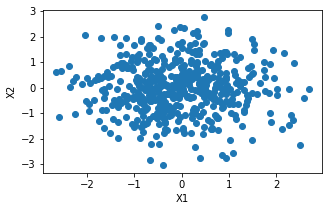

In [4]:
# First, build our X1,X2 randomly from gaussian distributions
np.random.seed(0)
X = np.random.randn(n, 2)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1")
plt.ylabel("X2");

In [5]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


In [6]:
# Then, build our binary class y 
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise" 

epsilon = noise * np.random.randn(n, )

y_bool = np.logical_xor(
    x1 > epsilon, 
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)

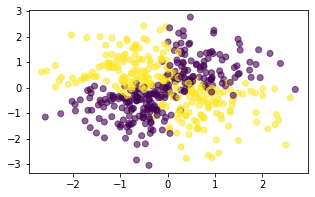

In [7]:
# We have re-created the XOR quadrant!
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)

## 2 - Linear SVM

Welcome _Support Vector Machine (SVM)_ 🎉

Linear SVM classifier's goal is to find the best vector **w**

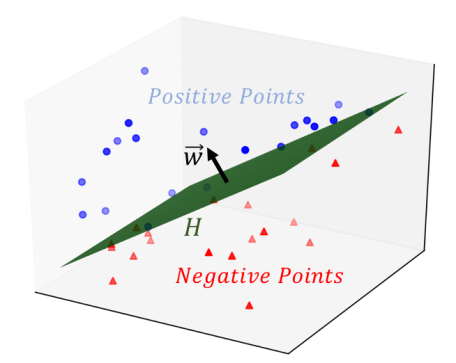

- whose direction uniquely determines the decision boundary hyperplan
- and minimizes the sum of hinge losses for outliers

👉 **w** contains all model parameters learned during `.fit()`  
👉 `C` is the **cost** associated with the **wrong** classification

___
❓ Fit a **linear** SVC classifier on the whole dataset with the value `C` = 1. 

In [11]:
from sklearn.svm import SVC
C=1
svc = SVC(kernel='linear', C=C)
svc.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'linear',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None}

In [15]:
svc.fit(X,y)

SVC(C=1, kernel='linear')

In [16]:
svc.__dict__

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'linear',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': False,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': None,
 '_sparse': False,
 'n_features_in_': 2,
 'class_weight_': array([1., 1.]),
 'classes_': array([0, 1]),
 '_gamma': 0.513223482048345,
 'support_': array([  0,   1,   5,   6,   7,  13,  14,  15,  18,  19,  20,  22,  24,
         26,  27,  29,  30,  34,  38,  39,  42,  46,  47,  48,  49,  53,
         54,  55,  59,  61,  62,  64,  71,  72,  74,  76,  79,  81,  84,
         85,  88,  90,  96,  98,  99, 100, 101, 104, 105, 107, 110, 112,
        113, 114, 115, 119, 120, 121, 122, 123, 124, 126, 127, 128, 130,
        131, 136, 137, 140, 144, 145, 153, 156, 158, 159, 160, 161, 162,
        171, 172, 175, 177, 178, 181, 182, 183, 191, 193, 196, 197, 198,
        199, 200, 2

❓ Visualize the decision boundaries of your model using the `plot_decision_regions` function given to you in `utils/plots.py`

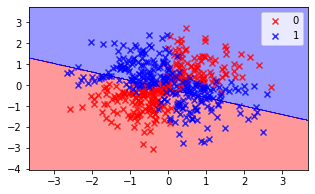

In [17]:
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, svc)

❓Save below your "guesstimated" accuracy score for such model (roughly) 

In [19]:
linear_svm_score = svc.score(X,y)
linear_svm_score

0.586

In [ ]:
# YOUR CODE HERE

❓ Do you think the value of `C` has any importance in this case?

<details><summary>Answer</summary>
    
☝️ linear SVM classifiers always separate data points with a straight line, no matter the cost, `c`, being applied to wrongly classified data points. We are structurally trying to fit the wrong type of model to the dataset.

</details>

In [ ]:
# YOUR CODE HERE

❓ Do you think a Logistic Regression would perform better? Feel free to try.

In [ ]:
# YOUR CODE HERE

🧪 Test your code

In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('linear_svm',
    linear_svm_score=linear_svm_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/05-Model-Tuning/03-SVM
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_linear_svm.py::TestLinearSvm::test_score PASSED               [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/linear_svm.pickle

git commit -m 'Completed linear_svm step'

git push origin master


## 3. Kernel SVM 🔥

📚 First, **read section 5 (Kernels) of today's lecture carefully**. Take your time, it is part of the challenge

❓In your own words, what is a Kernel in one sentence?

<details>
    <summary>A possible answer</summary>

It is a measure of "similarity" between points, which is used to classify points in SVM models (two points with large similarity would be classified similarly)
</details>

❓Cite below 4 different kernel by their names

<details>
    <summary>A possible answer</summary>

- Linear
- Polynomial
- Radial Basis Fonction (rbf)
- Sigmoid
</details>

## 3.2 Polynomial Kernels

A polynomial kernel of degree 2 is as follows 
    $$K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^2$$

By changing the kernel, we have changed our notion of _similarity_: instead of measuring similarity by how close the points are in terms of dot product ("cosine similarity") for the linear kernel, we are measuring similarity based on **whether points are within a circle to each other or not.** 

This is **equivalent** to creating the new quadratic features as below (Kernel Trick)
    $$\phi(x) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ x_2 x_1 \\ x_2^2 \\  \sqrt{2c} \ x_1 \\ \sqrt{2c} \ x_2\end{bmatrix}$$

❓ Intuitively speaking, what's the minimum number of kernel "degrees" `d` do you think we need to best fit our XOR dataset? 

<details>
    <summary>Answer</summary>

`d=2` should be enough because our XOR condition can be computed from polynom `x1 * x2`
    
$$    
    class = 
\begin{cases}
    0 & \text{if } x_1 x_2 > 0\\
    1 & \text{otherwise}
\end{cases}
$$
</details>


❓ Fit and plot a SVM `poly` of degree 2, keeping `C = 100` large enough so as to visualize the "maximum margin classifier"

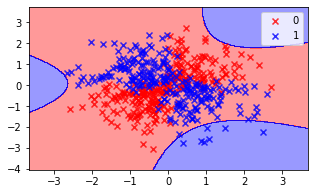

In [23]:
poly = SVC(kernel = 'poly', C = 100)
poly.fit(X,y)
plot_decision_regions(X, y, poly)

❓ Given that you know how this XOR dataset has been engineered, which adjectives best describe your svm's performance?

In [26]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = [b,d]


🧪 Test your code

In [27]:
from nbresult import ChallengeResult

result = ChallengeResult('poly_svm',
    poly_svm_performance=poly_svm_performance)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/05-Model-Tuning/03-SVM
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_poly_svm.py::TestPolySvm::test_performance PASSED             [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/poly_svm.pickle

git commit -m 'Completed poly_svm step'

git push origin master


❓ Still not convinced? You can double-check that polynomial kernel is equivalent to having access to polynomial features by fitting this model below

- We create polynomial features as a first step (feature engineering)
- and then fit a linear SVM.

(And don't worry about the syntax of pipelines, we will see more on pipeline in next session! 🔥)

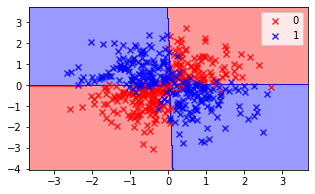

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Choose your degree
degree = 2

equivalent_polynomial_model = make_pipeline(
    (PolynomialFeatures(degree=degree)),  # First, create all polynomial combinations of your features
    (SVC(kernel="linear", C=100))  # Then, fit a linear SVM
)
equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

☝️ Although mathematically equivalent, this manual feature engineering requires much more computational power than the kernel trick, and will not scale with higher dimensionality!

### Moons dataset

Let's now try with a harder dataset to classifiy!

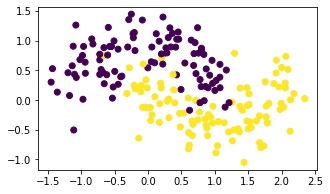

In [30]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Try to fit a polynomial SVM kernel to such dataset? 

Try it out **visually** below by changing the values of `C` and `degree` and `coef0`.

`coef0` play the role of $c$ in $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$
- When equal to 0, you only have access to the d-th degree polynomial features
- The higher it is, the more your model will consider lower degree features

In [31]:
from ipywidgets import interact # pip install ipywidgets if you haven't done it already

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

☝️ A polynomial kernel can fit pretty much anything as long as the degree is high enough.  

However, be aware that too high polynomial kernels will make models prone to overfitting!


## 3.3 RBF - Radial Basis Function Kernel (aka gaussian)

Here comes the RBF Kernel! 
Pretty much the go-to kernel for SVM (and default one in sklearn).   

It proves very robust to variety of problems, and easier to fine-tune than polynomial, as it only requires gridsearching its kernel hyper-parameter `gamma` $\gamma$, on top of `C` of course

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- The larger the euclidian distance between two points $||\textbf{a}-\textbf{b}||^2$, the closer the kernel function is to zero. This means that two points far away are more likely to be different.

- `gamma` $\gamma$ reduces each instance’s range of influence on the others (**myopia**). Stronger $\gamma$ values will make your model overfit by looking "too closely" at small-scale irregularities

- `C` still controls the **hardness** of the margin. Stronger values will make your model overfit.

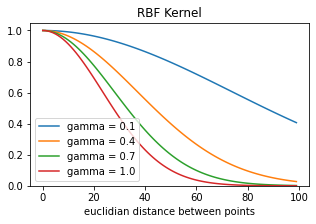

In [32]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

❓ Fit and plot decision regions of an SVM classifier with an RBF kernel

- Start with a model with very low variance (ex: `gamma=0.01` and `C=0.1`)
- Increase `gamma` until you observe obvious overfitting. It should be clearly visible on the graph. 

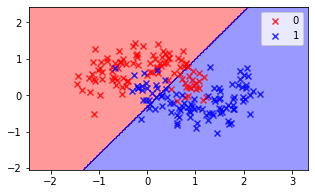

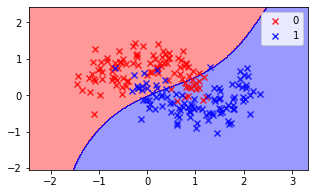

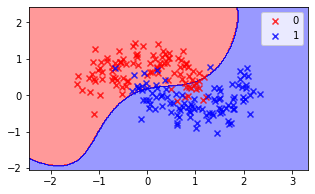

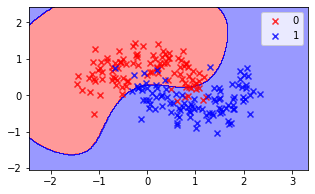

In [35]:
count=0
for gamma in np.linspace(0.01, 1, 4):
    svm = SVC(kernel='rbf', C=0.1, gamma=gamma)
    svm.fit(X, y)
    plt.figure(count)
    plot_decision_regions(X, y, classifier=svm)
    count = count+1


❓ Now, use you best estimated value of gamma (for instance `gamma=1`), and increase `C` this time until you overfit


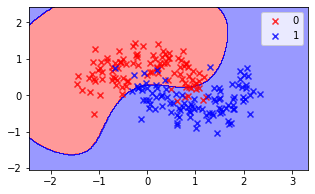

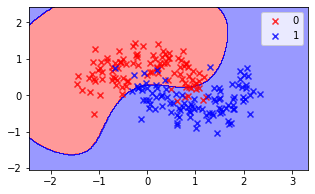

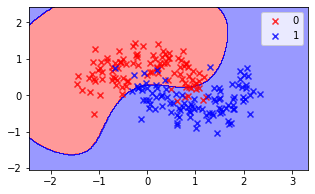

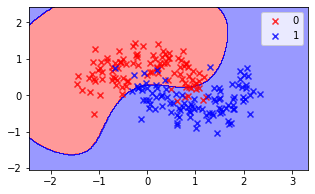

In [36]:
count=0
for C in np.linspace(0, 1, 4):
    svm = SVC(kernel='rbf', C=0.1, gamma=1)
    svm.fit(X, y)
    plt.figure(count)
    plot_decision_regions(X, y, classifier=svm)
    count = count+1


☝️ Feel free to create your own interactive plot using `@interact` as above and try to "visually" fine the best `C` and `gamma`

In [37]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10])
def svc(C=1, gamma=1):
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=1, options=(0.1, 1, 10, 100, 1000, 10000), value=1), Dro…

❓Store below your best visual guess for `C` and `gamma` (rounded to power of tens: 0.1, 1, 10, 100 ...)

In [38]:
best_c = 1 #?
best_gamma = 1 #? 

🧪 Test your code

In [39]:
from nbresult import ChallengeResult
result = ChallengeResult('rbf_svm',
                         best_c=best_c, 
                         best_gamma=best_gamma)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/05-Model-Tuning/03-SVM
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_rbf_svm.py::TestRbfSvm::test_hyperparams PASSED               [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/rbf_svm.pickle

git commit -m 'Completed rbf_svm step'

git push origin master


## 3.4 Sigmoid kernel

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

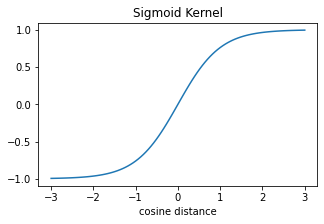

In [40]:
# The "tangent hyperbolic" function ressembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ The Sigmoid kernel compresses the "cosine similarity" used in the linear kernel into a [-$\gamma$,+$\gamma$] interval.

❓ Try to **visually** fintune your rbf model, doing a coarse grain search for 
- `C=[0.1, 1, 10, 100, 1000, 10000]` 
- `gamma = [0.001, 0.01, 0.1, 1, 10]`  

using `@interact` decorator combined with `plot_decision_regions`

In [41]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), …

☝️  Not easy to make it work visually, right? Time for a automated GridSearch!

## 4. Grid Search the best kernel

❓ `RandomizedSearchCV` for the best `kernel`, and best kernek hyperparameters at the same time (warning: scikit-learn has issues when gridsearching polynomial kernels at the same time than other)
 
Use your visual intuitions above to define plausible range of values to try-out

In [202]:

from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

grid = {'gamma': stats.uniform(0.01, 0.03), 
        'C': stats.uniform(500,1000), 
        'coef0': stats.uniform(0.1, 0.15), 
        'kernel': [#'linear', 
            'rbf'
            #'sigmoid'#, 
            #'precomputed'
        ]
       }


In [203]:
search = RandomizedSearchCV(SVC(), 
                            grid, 
                            n_iter=100,  # number of draws
                            cv=5, 
                            n_jobs=-1)

❓ Plot your best model's decision boundaries

In [204]:
search.fit(X,y)
search.best_estimator_

SVC(C=1392.654601641643, coef0=0.15653627565126293, gamma=0.03939444458268865)

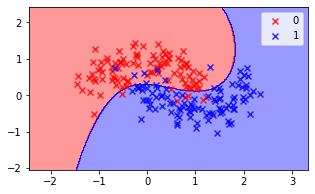

In [205]:
plot_decision_regions(X,y,search.best_estimator_)

❓ 5-fold cross-validate its accuracy and store your mean result as `sigmoid_svm_cv_accuracy`

In [208]:
from sklearn.model_selection import cross_validate

cv_score = cross_validate(search.best_estimator_, X,y,cv=5)
sigmoid_svm_cv_accuracy =cv_score["test_score"].mean()


🧪 Test your code

In [209]:
from nbresult import ChallengeResult

result = ChallengeResult('sigmoid_svm',
    sigmoid_svm_cv_accuracy=sigmoid_svm_cv_accuracy)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/cherif/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/cherif/code/cherifbenham/data-challenges/05-ML/05-Model-Tuning/03-SVM
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_sigmoid_svm.py::TestSigmoidSvm::test_accuracy PASSED          [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/sigmoid_svm.pickle

git commit -m 'Completed sigmoid_svm step'

git push origin master


## 5. Generalization

❓Choose your `best_svm` model to put in "production" in your app on the cloud. Fit it on the half moon dataset.

In [210]:
best_svm =search.best_estimator_
best_svm.fit(X,y)

SVC(C=1392.654601641643, coef0=0.15653627565126293, gamma=0.03939444458268865)

After a few days, it has received and predicted new data points never having seen them before (our "test set")

In [211]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

        ❓ Visualize its performance by doing `plot_decision_regions` including `test_idx` as optional argument.  
Count how many misclassified test samples you get!

0.465

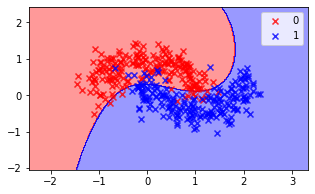

In [212]:
plot_decision_regions(X_full,y_full,best_svm)
pred = best_svm.predict(X_test)
Z = y_test * pred
Z.sum()/len(Z)

In [ ]:
number_misclassified_test = None

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('generalization',
    number_misclassified_test=number_misclassified_test)
result.write()
print(result.check())

## 6. kNN vs. SVM ?

Such non-linear problem could also fit well on a kNN classifier.
Try to find the best k visually and compare its behavior to the SVM.

In [216]:
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors':stats.randint(1,100)}
search = RandomizedSearchCV(KNeighborsClassifier(), 
                            grid, 
                            n_iter=100,  # number of draws
                            cv=5, 
                            n_jobs=-1)
search.fit(X,y)
search.best_estimator_
cv_score = cross_validate(search.best_estimator_, X,y,cv=5)
cv_score["test_score"].mean()


0.9400000000000001

🏁 Congratulation! Dont forget to **commit** and **push** your notebook